## Kutubxonalarni import qilish
Ushbu bo'lim ma'lumotlarni tahlil qilish uchun kerakli Python kutubxonalarini import qiladi.


In [2]:
# Pclass & Age Analysis
# Team Leader: Suhrob

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../Titanic_Dataset.csv")
df.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## Yo'lovchilar sinfi bo'yicha omon qolish darajasi
Ushbu tahlil omon qolish darajasi yo'lovchilar sinflarida qanday farqlanishini ko'rsatadi.

In [5]:
# Pclass bo‘yicha tirik qolish (ASOSIY ANALIZ)

df.groupby('pclass')['survived'].mean()


pclass
1    0.619195
2    0.429603
3    0.255289
Name: survived, dtype: float64

## Vizualizatsiya: Sinf bo'yicha omon qolish
Sinflar orasidagi omon qolish farqlarini ko'rish uchun chiziqli diagramma qo'llaniladi.

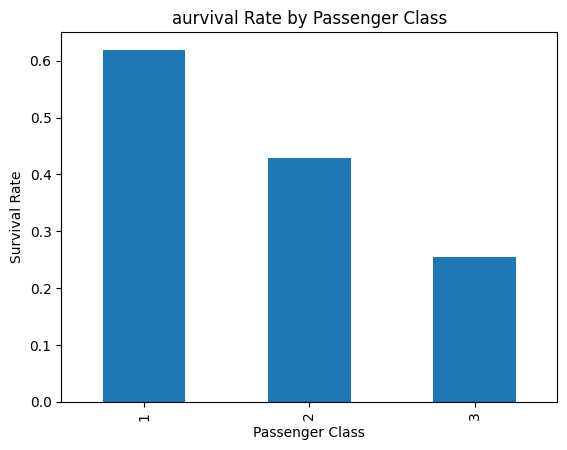

In [6]:
# Pclass bo‘yicha grafik

df.groupby('pclass')['survived'].mean().plot(kind='bar')
plt.title("aurvival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()


## Yosh statistikasi

Ushbu bo'limda yo'lovchilar yoshlarining statistik xulosasi keltirilgan.
U o'rtacha, minimal, maksimal va kvartil kabi ko'rsatkichlarni o'z ichiga oladi.
Bu bizga ma'lumotlar to'plamidagi umumiy yosh taqsimotini tushunishga yordam beradi.

In [10]:
# Age statistikasi

df['age'].describe()


count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

 ## Yosh taqsimoti gistogrammasi

Ushbu gistogramma yo'lovchilarning yosh taqsimotini ingl.
Unda yo‘lovchilar orasida qaysi yosh guruhlari ko‘proq bo‘lganligi ko‘rsatilgan.

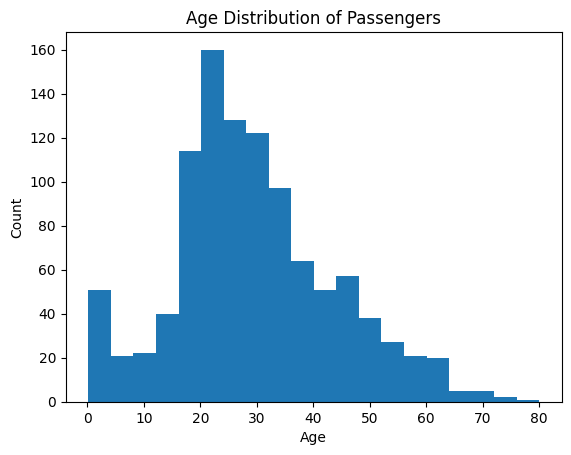

In [13]:
# Age histogramma

df['age'].plot(kind='hist', bins=20)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


## Yo'lovchilar sinfi bo'yicha o'rtacha yosh

Ushbu tahlil har bir chipta sinfidagi yo'lovchilarning o'rtacha yoshini hisoblab chiqadi.
Bu yo'lovchilar sinflari o'rtasidagi yosh farqlarini aniqlashga yordam beradi.

In [14]:
df.groupby('pclass')['age'].mean()


pclass
1    39.159930
2    29.506705
3    24.816367
Name: age, dtype: float64

## Yosh guruhlari bo'yicha omon qolish darajasi

Omon qolish darajasini tahlil qilish uchun yo'lovchilar yosh guruhlariga bo'lingan.
Bu yoshning omon qolish ehtimoliga qanday ta'sir qilganini tushunishga yordam beradi.

In [18]:
df.groupby(
    pd.cut(df['age'], [0, 18, 40, 60, 80]),
    observed=True
)['survived'].mean()


age
(0, 18]     0.492228
(18, 40]    0.386581
(40, 60]    0.422680
(60, 80]    0.242424
Name: survived, dtype: float64

## Yo'lovchilar sinfi va jinsi bo'yicha omon qolish darajasi

Ushbu tahlil yo'lovchilar sinfi va jinsiga qarab omon qolish darajasini o'rganadi.
Bu ijtimoiy omillar omon qolishga qanday ta'sir qilgani haqida chuqurroq ma'lumot beradi.

In [17]:
df.groupby(['pclass', 'sex'])['survived'].mean()


pclass  sex   
1       female    0.965278
        male      0.340782
2       female    0.886792
        male      0.146199
3       female    0.490741
        male      0.152130
Name: survived, dtype: float64

## Xulosa

Tahlil shuni ko'rsatadiki, yo'lovchilar sinfi omon qolishga kuchli ta'sir ko'rsatdi.
Birinchi toifadagi yo'lovchilarning omon qolish ehtimoli ko'proq edi.
Yo‘lovchilarning aksariyati 20 yoshdan 40 yoshgacha bo‘lganlar edi.